In [3]:
%matplotlib inline
import os, glob, warnings, sys
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiLabelsMasker
from nltools.data import Brain_Data
from nltools.stats import one_sample_permutation, two_sample_permutation, correlation_permutation
import seaborn as sns
from nltools.stats import threshold
from nltools.mask import expand_mask, collapse_mask
import scipy
from scipy.stats import pearsonr,spearmanr
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity



In [4]:
import sys
sys.version

'3.9.5 (default, Jun  4 2021, 12:28:51) \n[GCC 7.5.0]'

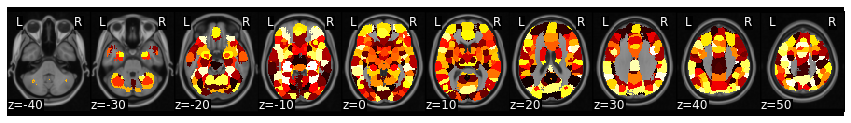

In [5]:
n_roi = 200
#n_roi = 380
roi = Brain_Data('https://neurovault.org/media/images/2099/Neurosynth%20Parcellation_2.nii.gz')
#roi=Brain_Data('https://neurovault.org/media/images/1549/MMP_in_MNI_corr.nii.gz')
roi.plot()
#masker=NiftiLabelsMasker(labels_img=roi.to_nifti(), standardize=True) # parcellation + Summarize brain signals from clusters 
roi_x = expand_mask(roi) # an error occur and don't know why # binary mask for each ROI

In [6]:
subList=[104,105,108,109,110,111,112,113,114,115,117,120,121,122,124,125,126,127,130,131,133,134,135,137,138,139,140]#27
fmri_dir="/media/haiyanwu/HDD2/xinyi_RanDishonesty/dishonesty_fMRI/"
glm_dir=fmri_dir+'1.GLM/SPM-GLM/GLM-1b/'
mask_dir=fmri_dir+'2.ROIextraction/masks/'
#beta_dir=glm_dir+'GLM-1b/merge_lie_beta/'

In [7]:
def ensure_dir(path):
    d = os.path.dirname(path)
    if not os.path.exists(d):
        os.makedirs(d)

In [9]:
# import os
# import shutil
# #获取该目录下所有文件，存入列表中
# ensure_dir(beta_dir)

# for subno in subList:
#     subno=subno-100

#     path=glm_dir+'GLM-1b/sub_%03d/'%(subno)
#     f=os.listdir(path)
#     for i in f:
#         shutil.copy(path+i,beta_dir)

In [8]:
ensure_dir(fmri_dir+'5.RSA/BrainDist-lie3/')
ensure_dir(fmri_dir+'5.RSA/BrainDist-hon3/')
ensure_dir(fmri_dir+'5.RSA/BrainDist-lie-hon3/')

In [8]:
metric = 'correlation'
error=[]
for contrast in ['lie3']:
    if contrast=='lie3':
        num=7
    if contrast=='hon3':
        num=8
    if contrast=='lie-hon3':
        num=9
    print(contrast)
    

    data_out = Brain_Data()
    for subno in subList:
        
        data_out = data_out.append(Brain_Data(os.path.join(glm_dir,
                    'sub-%03d/con_%04d.nii'%(subno,num)))) 
        
    parcelDist = []
    for parcelInd,parcel in enumerate(roi_x):

        curDist = data_out.apply_mask(parcel).distance(metric=metric)
        parcelDist.append(curDist.data)
    brainDist = pd.DataFrame(parcelDist,index=range(len(roi_x))).T
    brainDist.to_csv(os.path.join(fmri_dir,
                '5.RSA/BrainDist-%s/BrainDist_%s_%s_roi%03d.csv' % (contrast,metric,contrast,n_roi)),index=None)
    
        
    

lie3


# brainDist for ROIs

In [15]:
ROIs=['BA6']

In [16]:
metric = 'correlation'


i=0
for contrast in ['lie3','hon3','lie-hon3']:
    if contrast=='lie3':
        num=7
    if contrast=='hon3':
        num=8
    if contrast=='lie-hon3':
        num=9
    print(contrast)
    data_out = Brain_Data()
    for subno in subList:
        
        data_out = data_out.append(Brain_Data(os.path.join(glm_dir,
                    'sub-%03d/con_%04d.nii'%(subno,num)))) 
    parcelDist = []
    for indroi, roi in enumerate(ROIs):
        mask=Brain_Data(mask_dir+'Mask_%s.nii'%(roi))
        curDist = data_out.apply_mask(mask).distance(metric=metric)
        parcelDist.append(curDist.data)
        
    brainDist = pd.DataFrame(parcelDist,index=range(len(ROIs))).T
    brainDist
    brainDist.to_csv(os.path.join(fmri_dir,
                '5.RSA/BrainDist-%s/BrainDist_%s_%s_roi-%s.csv' % (contrast,metric,contrast,roi)),index=None)
    

lie3
hon3
lie-hon3


In [14]:
contrast='lie3'
metric = 'correlation'
lie3_matrix=pd.read_csv(os.path.join(fmri_dir,'5.RSA/BrainDist-%s/BrainDist_%s_%s_roi%03d.csv' % (contrast,metric,contrast,n_roi)))

In [46]:
matrix=scipy.spatial.distance.squareform(lie3_matrix.loc[:,'31'])

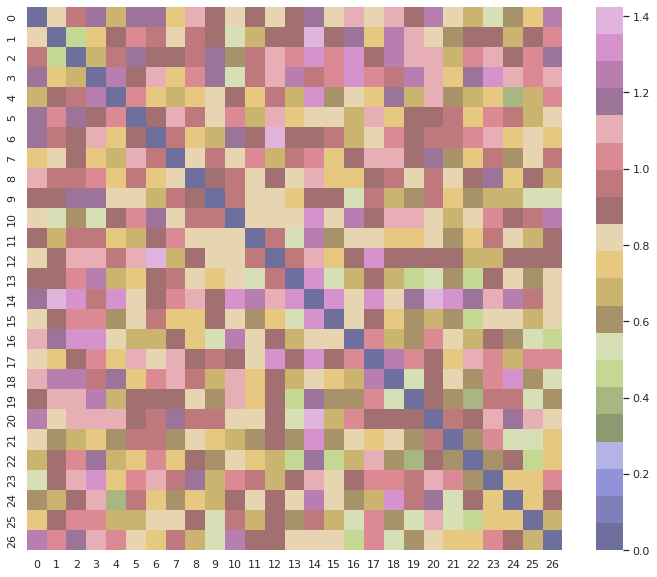

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,10)})
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix,cmap='tab20b',alpha=0.7)
plt.savefig('/media/haiyanwu/HDD2/xinyi_RanDishonesty/dishonesty_fMRI/1.GLM/f-brain/matrix.svg')